# Groupby

In [1]:
import numpy as np
import pandas as pd

import cx_Oracle

# We use the table RATINGS
max_movieid, max_userid reduce the size of the data


In [2]:
max_movieid=10
max_userid=2000
connection =cx_Oracle.connect(user='websem', password='websem108', 
                              dsn='tirpitz.ms.mff.cuni.cz:1511/jedenact.ms.mff.cuni.cz')
ratings=pd.read_sql_query('''select * from MRATINGS 
                            WHERE MOVIEID<{} AND USERID<{}
                            ORDER BY MOVIEID, USERID
'''.format(max_movieid,max_userid)
                          ,connection)
ratings.head()

C:\Users\marta\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,USERID,MOVIEID,RATING,TS,DT,TOP5,K,DTYY,DTMM,DTDW,DTHH,KTT,TRAIN,TEST,DIFF
0,3,1,4.0,944919407,1999-12-11 13:36:47,None,81,1999,12,7,13,81,A,N,0.0
1,6,1,5.0,858275452,1997-03-13 17:50:52,None,18,1997,3,5,17,18,A,N,1.0
2,8,1,4.0,833981871,1996-06-05 13:37:51,None,45,1996,6,4,13,45,A,N,0.0
3,10,1,4.0,943497887,1999-11-25 02:44:47,None,5,1999,11,5,2,5,N,A,NaN
4,11,1,4.5,1230858821,2009-01-02 01:13:41,None,138,2009,1,6,1,138,A,N,0.5


## Simple Series aggregates

In [3]:
ratings.RATING.sum()

7459.0

In [4]:
ratings.RATING.count()

2072

In [13]:
print("min={}; max={}".format(ratings.RATING.min(),ratings.RATING.max()))

min=0.5; max=5.0


In [15]:
ratings.RATING.mean()

3.599903474903475

## Manual evalutation of the  mean: we divide sum/count

In [6]:
ratings.RATING.sum()/ratings.RATING.count()

3.599903474903475

## Pre-defined aggregates (with Czech translation ;-)
    count()             počet prvků
    min(), max()        
    first(), last()     time series - později
    mean(), median()    průměr, medián (uspořádám a prostřední prvek)
    std(), var()        standardní odchylka, rozptyl
    mad()               střední absolutní chyba
    prod()              součin
    sum()               součet
    
    

# DataFrame groupby

## Groupby: 
    dataframe.
        ('column_to_group_by') # or a list of columns
        [['column1_to_aggregate','col2']]
        .function()

In [7]:
ratings.groupby('MOVIEID')['RATING'].mean()

MOVIEID
1    3.988827
2    3.242038
3    3.161202
4    3.062500
5    3.130653
6    3.895652
7    3.429688
8    3.166667
9    3.089552
Name: RATING, dtype: float64

### Groupby evaluation scheme

Python Data Science Handook


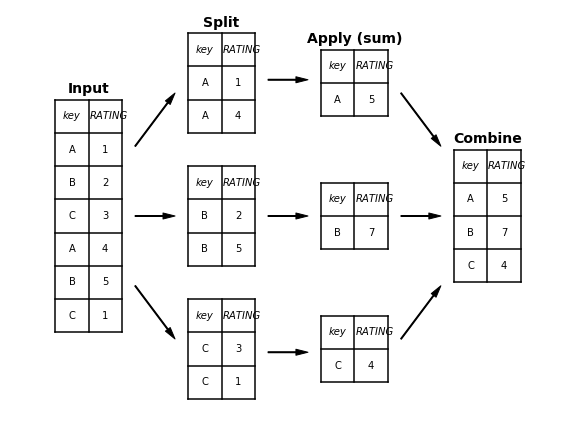

In [8]:
from IPython.core.display import Image, display
print('Python Data Science Handook')
display(Image('figures/03.08-split-apply-combine.png', width=1900))

### Step by step
DataFrameGrooupBy after the index specification

In [9]:
ratings.groupby('MOVIEID')

SeriesGroupBy after the columns specification

In [10]:
ratings.groupby('MOVIEID')['RATING']

results presented as a DataFrame

In [11]:
ratings.groupby('MOVIEID')['RATING'].mean()

MOVIEID
1    3.988827
2    3.242038
3    3.161202
4    3.062500
5    3.130653
6    3.895652
7    3.429688
8    3.166667
9    3.089552
Name: RATING, dtype: float64

### We may evaluate more functions at once.

In [12]:
ratings.groupby('MOVIEID')['RATING'] .aggregate(['mean','median'])  #více funkcí

,mean,median
MOVIEID,,
1,3.988827,4.0
2,3.242038,3.0
3,3.161202,3.0
4,3.062500,3.0
5,3.130653,3.0
6,3.895652,4.0
7,3.429688,3.5
8,3.166667,3.0
9,3.089552,3.0


### Apply to all columns

In [13]:
ratings.groupby('MOVIEID').count() 

,USERID,RATING,TS,DT,TOP5,K,DTYY,DTMM,DTDW,DTHH,KTT,TRAIN,TEST,DIFF
MOVIEID,,,,,,,,,,,,,,
1,716,716,716,716,0,716,716,716,716,716,716,716,716,659
2,314,314,314,314,0,314,314,314,314,314,314,314,314,281
3,183,183,183,183,0,183,183,183,183,183,183,183,183,165
4,32,32,32,32,0,32,32,32,32,32,32,32,32,29
5,199,199,199,199,0,199,199,199,199,199,199,199,199,181
6,345,345,345,345,0,345,345,345,345,345,345,345,345,328
7,192,192,192,192,0,192,192,192,192,192,192,192,192,169
8,24,24,24,24,0,24,24,24,24,24,24,24,24,23
9,67,67,67,67,0,67,67,67,67,67,67,67,67,54


## MultiIndex - more columns as the index

In [14]:
ratings.groupby(['MOVIEID', 'DTYY'])['RATING'].aggregate('mean')

MOVIEID  DTYY
1        1996    4.252336
         1997    3.966292
         1998    4.062500
         1999    3.836364
         2000    4.433962
                   ...   
9        2004    3.250000
         2005    1.500000
         2006    2.500000
         2007    2.750000
         2014    2.000000
Name: RATING, Length: 148, dtype: float64

## DataFrame from multiindex

In [15]:
ratings.groupby(['MOVIEID', 'DTYY'])['RATING'].aggregate('mean').reset_index()

,MOVIEID,DTYY,RATING
0,1,1996,4.252336
1,1,1997,3.966292
2,1,1998,4.062500
3,1,1999,3.836364
4,1,2000,4.433962
...,...,...,...
143,9,2004,3.250000
144,9,2005,1.500000
145,9,2006,2.500000
146,9,2007,2.750000


### Two dimensional table from the multiindex

In [16]:
ratings.groupby(['MOVIEID', 'DTYY'])['RATING'].aggregate('mean').unstack() 

DTYY,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
MOVIEID,,,,,,,,,,,,,,,,,,,,
1,4.252336,3.966292,4.062500,3.836364,4.433962,4.121212,3.800000,4.071429,4.125000,3.783333,3.611111,3.750000,3.580645,3.865385,4.050000,4.260000,4.200000,4.047619,3.676471,3.25
2,3.573034,4.166667,3.083333,3.307692,3.083333,3.000000,3.666667,3.166667,3.093750,2.857143,2.823529,3.027778,3.142857,2.227273,3.416667,3.187500,3.583333,3.666667,3.333333,3.25
3,3.309524,3.454545,2.666667,2.555556,4.000000,3.250000,3.000000,4.000000,3.100000,2.421053,2.590909,3.166667,3.000000,3.750000,3.666667,3.500000,2.500000,4.000000,2.000000,2.50
4,3.357143,3.000000,2.333333,3.333333,2.666667,3.500000,3.000000,2.000000,3.000000,NaN,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.431034,3.163636,3.000000,2.500000,3.125000,3.333333,3.000000,2.833333,3.071429,2.600000,2.714286,3.200000,3.000000,2.666667,2.625000,2.333333,1.000000,3.875000,NaN,3.00
6,3.920000,3.777778,3.900000,3.954545,4.150000,4.363636,4.000000,4.000000,3.909091,3.368421,3.843750,3.884615,3.583333,4.375000,3.750000,3.875000,4.055556,3.625000,3.928571,3.25
7,3.641026,3.396825,3.142857,3.444444,4.083333,3.222222,3.400000,4.000000,3.437500,2.916667,2.833333,3.666667,3.500000,3.250000,3.250000,3.500000,NaN,NaN,NaN,3.50
8,3.444444,NaN,3.000000,3.000000,3.500000,4.000000,3.500000,NaN,2.833333,1.750000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3.400000,3.125000,2.000000,2.500000,3.666667,NaN,2.000000,3.000000,3.250000,1.500000,2.500000,2.750000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


### Tripple multiindex

In [17]:
ratings.groupby(['MOVIEID', 'DTYY','DTDW'])['RATING'].aggregate('count').reset_index()


,MOVIEID,DTYY,DTDW,RATING
0,1,1996,1,16
1,1,1996,2,16
2,1,1996,3,20
3,1,1996,4,19
4,1,1996,5,11
...,...,...,...,...
628,9,2005,4,1
629,9,2006,2,1
630,9,2007,2,1
631,9,2007,6,1


### Multiindex in columns

In [18]:
ratings.groupby(['MOVIEID'])[['RATING','DTYY']].aggregate(['mean','count'])

RATING               DTYY      
             mean count         mean count
MOVIEID                                   
1        3.988827   716  2002.902235   716
2        3.242038   314  2002.305732   314
3        3.161202   183  2000.267760   183
4        3.062500    32  1998.531250    32
5        3.130653   199  2000.331658   199
6        3.895652   345  2001.333333   345
7        3.429688   192  1999.604167   192
8        3.166667    24  1999.625000    24
9        3.089552    67  1998.119403    67

## Towards aggregation by columns

first, two dimensional dataframe

In [17]:
df=ratings.groupby(['MOVIEID', 'DTYY'])['RATING'].aggregate('count').unstack()
df.head()

DTYY,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
MOVIEID,,,,,,,,,,,,,,,,,,,,
1,107.0,89.0,16.0,55.0,53.0,33.0,15.0,21.0,24.0,60.0,36.0,32.0,31.0,26.0,30.0,25.0,15.0,21.0,17.0,10.0
2,89.0,6.0,12.0,13.0,24.0,14.0,9.0,3.0,16.0,28.0,17.0,18.0,14.0,11.0,18.0,8.0,6.0,3.0,3.0,2.0
3,42.0,55.0,3.0,9.0,5.0,4.0,5.0,1.0,10.0,19.0,11.0,6.0,3.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0
4,14.0,2.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,58.0,55.0,4.0,4.0,8.0,6.0,1.0,3.0,7.0,10.0,7.0,10.0,7.0,3.0,4.0,6.0,1.0,4.0,NaN,1.0


### Row aggregation is the default

In [20]:
df.mean()

DTYY
1996    50.888889
1997    44.625000
1998     6.666667
1999    13.222222
2000    14.444444
2001    11.375000
2002     6.222222
2003     4.750000
2004     9.111111
2005    18.875000
2006    11.000000
2007    11.000000
2008    11.333333
2009     8.666667
2010    11.166667
2011     7.500000
2012     6.400000
2013     6.600000
2014     5.800000
2015     2.833333
dtype: float64

### Column aggregation axis='columns'

In [21]:
df.mean(axis='columns')

MOVIEID
1    35.800000
2    15.700000
3     9.150000
4     2.909091
5    10.473684
6    17.250000
7    11.294118
8     2.666667
9     5.583333
dtype: float64

### More complex function, applied on rows

In [20]:
df.describe()

DTYY,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,9.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,9.000000,8.00000,9.000000,8.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,6.000000
mean,50.888889,44.625000,6.666667,13.222222,14.444444,11.375000,6.222222,4.750000,9.111111,18.87500,11.000000,11.000000,11.333333,8.666667,11.166667,7.500000,6.400000,6.600000,5.800000,2.833333
std,33.983248,30.691728,4.949747,16.954187,16.440127,11.160357,5.166667,6.881653,7.356025,18.91664,11.213831,10.184021,10.856642,9.244818,10.998485,9.005554,5.899152,8.142481,6.723095,3.544949
min,9.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25.000000,19.500000,3.000000,3.000000,3.000000,3.500000,2.000000,1.000000,3.000000,8.00000,1.000000,5.000000,4.000000,2.250000,3.250000,1.750000,1.000000,3.000000,1.000000,1.000000
50%,42.000000,55.000000,4.000000,9.000000,8.000000,7.500000,5.000000,2.000000,8.000000,15.50000,9.000000,8.000000,9.500000,5.500000,7.000000,5.000000,6.000000,4.000000,3.000000,1.500000
75%,75.000000,63.000000,10.000000,13.000000,20.000000,16.000000,10.000000,4.000000,11.000000,21.25000,16.000000,14.250000,13.500000,10.250000,16.000000,7.500000,9.000000,4.000000,7.000000,2.000000
max,107.000000,89.000000,16.000000,55.000000,53.000000,33.000000,15.000000,21.000000,24.000000,60.00000,36.000000,32.000000,31.000000,26.000000,30.000000,25.000000,15.000000,21.000000,17.000000,10.000000


# Iteration over groups


group iteration one by one to apply a user defined function

In [23]:
for (movieid, group) in ratings.groupby('MOVIEID'):
    print("for MOVIEID={} is the shape={}".format(movieid, group.shape))

for MOVIEID=1 is the shape=(716, 15)
for MOVIEID=2 is the shape=(314, 15)
for MOVIEID=3 is the shape=(183, 15)
for MOVIEID=4 is the shape=(32, 15)
for MOVIEID=5 is the shape=(199, 15)
for MOVIEID=6 is the shape=(345, 15)
for MOVIEID=7 is the shape=(192, 15)
for MOVIEID=8 is the shape=(24, 15)
for MOVIEID=9 is the shape=(67, 15)


## Dispatch: Sends a function to every group

    applies the function to each group separatelly
    joins the resulst into a DataFrame

In [24]:
ratings.groupby('MOVIEID')['RATING'].describe()

,count,mean,std,min,25%,50%,75%,max
MOVIEID,,,,,,,,
1,716.0,3.988827,0.849031,1.0,3.50,4.0,5.0,5.0
2,314.0,3.242038,0.950206,0.5,3.00,3.0,4.0,5.0
3,183.0,3.161202,0.925804,0.5,3.00,3.0,4.0,5.0
4,32.0,3.062500,0.981687,1.0,2.75,3.0,3.0,5.0
5,199.0,3.130653,0.973391,0.5,3.00,3.0,4.0,5.0
6,345.0,3.895652,0.836562,0.5,3.00,4.0,4.5,5.0
7,192.0,3.429688,0.948409,1.0,3.00,3.5,4.0,5.0
8,24.0,3.166667,0.868115,1.0,3.00,3.0,4.0,5.0
9,67.0,3.089552,0.965014,1.0,3.00,3.0,4.0,5.0


## Aggregate, filter, transform, apply

more complex aggregations are possible, see the function reference.


1. a dictionary of the aggregate function
2. user defined aggregate function over selected columns
3. as before, with a multiindex in columns.

In [22]:
df_rand = pd.DataFrame(np.random.rand(4,4), columns=list('abcd'))
df_rand['group'] = [0, 0, 1, 1]
df_rand.groupby('group').agg({'a':['sum', 'max'], 
                         'b':'mean', 
                         'c':'sum', 
                         'd': lambda x: x.max() - x.min()})

a                   b         c         d
            sum       max      mean       sum  <lambda>
group                                                  
0      0.370895  0.365773  0.590098  0.612651  0.262959
1      1.746700  0.927966  0.417701  1.141090  0.218608

### User defined aggregate function over selected columns

In [29]:
def f(x):
    d = {}
    d['a_sum'] = x['a'].sum()
    d['a_max'] = x['a'].max()
    d['b_mean'] = x['b'].mean()
    d['c_d_prodsum'] = (x['c'] * x['d']).sum()
    return pd.Series(d)

df_rand.groupby('group').apply(f)

,a_sum,a_max,b_mean,c_d_prodsum
group,,,,
0,0.370895,0.365773,0.590098,0.471838
1,1.746700,0.927966,0.417701,1.000844


### Multiindex in the User defined aggregate function

In [30]:
def f_mi(x):
        d = []
        d.append(x['a'].sum())
        d.append(x['a'].max())
        d.append(x['b'].mean())
        d.append((x['c'] * x['d']).sum())
        return pd.Series(d, index=[['a', 'a', 'b', 'c_d'], 
                                   ['sum', 'max', 'mean', 'prodsum']])

df_rand.groupby('group').apply(f_mi)

a                   b       c_d
            sum       max      mean   prodsum
group                                        
0      0.370895  0.365773  0.590098  0.471838
1      1.746700  0.927966  0.417701  1.000844

# Tasks

Evaluate:

    from the IMDB table select the first name from ACTORS
    from these first actors select such names that appeared in at least 10 movies (TT)
    merge these records with MMOVIES (by TT) and MRATING (by MOVIEID)
        Plot a scatterplot of the average rating and number of 'first actor appearences' for these actors.
    Calculate for them number of Action, Comedy and Drama movies they appeared as the first actor
    Calculate the relative precentage for each Genre for each Actor and summarize it in a table or a graph.
        Do they appear usually only in one movie genre?
        What are the actors in most movies for each genre?

In [3]:
connection =cx_Oracle.connect(user='websem', password='websem108', 
                              dsn='tirpitz.ms.mff.cuni.cz:1511/jedenact.ms.mff.cuni.cz')
imdb=pd.read_sql_query('select TT,NAME,RATING as IMDBRATING,RATED,METASCORE,DIRECTOR,ACTORS,LANGUAGE,YEAR from IMDB',connection)
imdb.head()

,TT,NAME,IMDBRATING,RATED,METASCORE,DIRECTOR,ACTORS,LANGUAGE,YEAR
0,tt2707810,None,NaN,None,NaN,None,None,None,None
1,tt2752070,None,NaN,None,NaN,None,None,None,None
2,tt2862490,Run,7.0,None,NaN,Mat Johns,"Joseph Stacey, Gabi Herrett, John Grey",English,2012
3,tt2992854,Julia,6.6,None,NaN,Chris Stuckmann,"Chris Stuckmann, Fae Rie, Sam Liz, Trevor Lawr...",English,2013
4,tt3108590,Swiming in Air,NaN,None,NaN,Justin Tipping,Madison Marie Steinacker,English,2013


In [6]:
imdb=imdb[imdb.ACTORS.notna()]

In [21]:
imdb['FIRST_ACTOR']=[a[:a.find(',')] for a in imdb.ACTORS]